## About Dataset
- This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GradeClass, classifies students' grades into distinct categories, providing a robust dataset for educational research, predictive modeling, and statistical analysis.

## Table of Contents
1. Student Information
    - Student ID
    - Demographic Details
    - Study Habits

1. Parental Involvement

2. Extracurricular Activities

3. Academic Performance

4. Target Variable: Grade Class
## Student Information
### Student ID
- StudentID: A unique identifier assigned to each student (1001 to 3392).

### Demographic Details
- Age: The age of the students ranges from 15 to 18 years.

- Gender: Gender of the students, where 0 represents Male and 1 represents Female.

- Ethnicity: The ethnicity of the students, coded as follows:
    - 0: Caucasian
    - 1: African American
    - 2: Asian
    - 3: Other

- ParentalEducation: The education level of the parents, coded as follows:
    - 0: None
    - 1: High School
    - 2: Some College
    - 3: Bachelor's
    - 4: Higher

### Study Habits
- StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.

- Absences: Number of absences during the school year, ranging from 0 to 30.

- Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

### Parental Involvement
- ParentalSupport: The level of parental support, coded as follows:
    - 0: None
    - 1: Low
    - 2: Moderate
    - 3: High
    - 4: Very High

### Extracurricular Activities
- Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.

- Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.

- Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.

- Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

### Academic Performance
- GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

### Target Variable: Grade Class
- GradeClass: Classification of students' grades based on GPA:
    - 0: 'A' (GPA >= 3.5)
    - 1: 'B' (3.0 <= GPA < 3.5)
    - 2: 'C' (2.5 <= GPA < 3.0)
    - 3: 'D' (2.0 <= GPA < 2.5)
    - 4: 'F' (GPA < 2.0)

### Conclusion
- This dataset offers a comprehensive view of the factors influencing students' academic performance, making it ideal for educational research, development of predictive models, and statistical analysis.

# Laod Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import os 
for dirname, _, filenames in os.walk('Student_performance_data _.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

### NumPy
- Short for Numerical Python, is a fundamental library in Python used for scientific computing and data manipulation. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.

### Key Features of NumPy
- Array Objects: Central to NumPy is the ndarray (n-dimensional array) object, which is a grid of values of the same type, indexed by a tuple of non-negative integers.

- Mathematical Functions: NumPy includes a wide array of mathematical operations such as trigonometric, statistical, and algebraic functions.

- Broadcasting: This feature allows arithmetic operations to be performed on arrays of different shapes, making it easier to write code without explicitly handling the shape of the data.

- Vectorization: NumPy operations are optimized to run efficiently, allowing for element-wise operations on arrays without the need for explicit loops.

- Integration with Other Libraries: NumPy serves as the foundation for many other scientific computing libraries in Python, such as SciPy, pandas, and Matplotlib.


### Explanation
- Import os: Import the os module to interact with the operating system.

- os.walk(): This function generates the file names in a directory tree by walking either top-down or bottom-up.

- dirname: The current directory path.

- _: A placeholder for directory names, which we don't use in this case.

- filenames: A list of the file names in the current directory.

- os.path.join(): This function joins one or more path components intelligently.

In [2]:

import pandas as pd
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

ml_client = MLClient.from_config(credential=DefaultAzureCredential())
data_asset = ml_client.data.get("StudentPerformanceDataAsset", version="1")

df = pd.read_csv(data_asset.path)
df

ModuleNotFoundError: No module named 'azure.ai'

In [6]:
# Load Data from csv
df = pd.read_csv('Student_performance_data _.csv')

# Watch how our data looks like
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Student_performance_data _.csv'

- The df.head() function is used to display the first few rows of a DataFrame in pandas. By default, it shows the first 5 rows, but you can specify a different number of rows as an argument if needed.

# Prepare Data

In [ ]:
# See more information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GradeClass         2392 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 243.1 KB


- The df.info() function in pandas provides a concise summary of a DataFrame, including the number of non-null entries, data types of each column, and memory usage. This function is particularly useful for getting a quick overview of your dataset.

- As we can see our data is very clean

In [ ]:
# How many Nan in data
df.isnull().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GradeClass           0
dtype: int64

- The df.isnull().sum() function in pandas is used to detect missing values (null values) in a DataFrame and return the count of null values in each column. This function is very useful for quickly assessing the completeness of your dataset and identifying columns with missing data.

In [ ]:
df.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
# quantity of unique values in columns
df.nunique()

Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GradeClass              5
dtype: int64

- df.nunique(): Returns a Series with the number of unique values in each column.

# Data Visualization

In [ ]:
# list of categorical columns where quantity of unique values <= 5 
categ_cols = ['Age','Gender','Ethnicity','ParentalEducation','Tutoring','Extracurricular','ParentalSupport','Sports','Music','Volunteering']

custom_labels = {
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Age': [15, 16, 17, 18],
    'ParentalEducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'Tutoring': ['No', 'Yes'],
    'ParentalSupport': ['No', 'Low', 'Moderate', 'High', 'Very High'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'Gender': ['Male', 'Female']
}

for col in categ_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=col,palette='deep')
    
    plt.title(f'Countplot of {col}')
    
    labels = custom_labels[col]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    
    plt.tight_layout()
    plt.show()

NameError: name 'df' is not defined

<Figure size 700x400 with 0 Axes>

## Code Explanation
- Loop Through Categorical Columns: Iterate over each column in categ_cols.

- Create a Figure: Set the size of the figure using plt.figure(figsize=(7, 4)).

- Generate Count Plot: Use Seaborn's countplot to plot the counts of unique values in the column.

- Set Title: Add a title to the plot using plt.title.

- Set Custom Labels for X-Ticks: Customize the x-axis labels using plt.xticks.

- Layout Adjustment: Adjust the layout to ensure everything fits well using plt.tight_layout.

- Display Plot: Show the plot using plt.show().

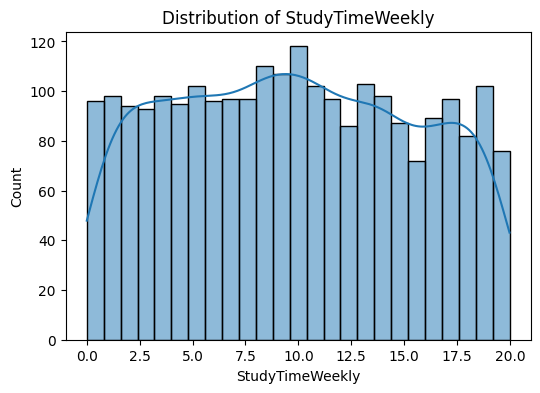

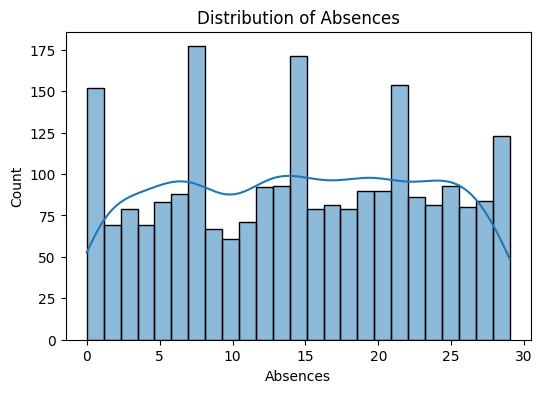

In [ ]:
# numerical columns
numeric_cols = ['StudyTimeWeekly','Absences']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, kde=True, bins=25)
    plt.title(f'Distribution of {col}')
    plt.show()

## Explanation
- plt.figure(figsize=(6, 4)): Sets the size of the plot.

- sns.histplot(data=df, x=col, kde=True, bins=25): Creates a histogram for the column with KDE and 25 bins.

- plt.title(f'Distribution of {col}'): Sets the title of the plot.

- plt.show(): Displays the plot.

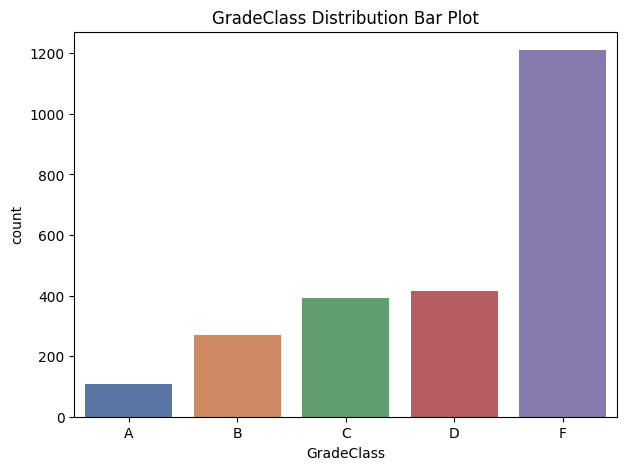

In [ ]:
plt.figure(figsize = (7,5))

labels = ['A','B','C','D','F']
ticks = range(len(labels))

sns.countplot(data = df, x = 'GradeClass',palette = 'deep')

plt.xticks(ticks= ticks,labels=labels)
plt.title("GradeClass Distribution Bar Plot")

plt.show()

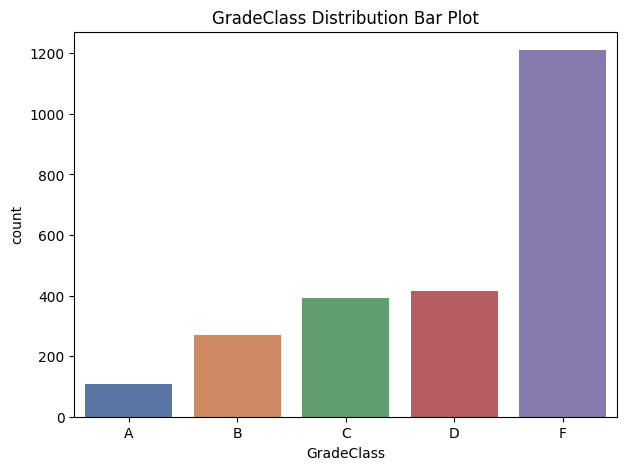

In [ ]:
plt.figure(figsize = (7,5))

labels = ['A','B','C','D','F']
ticks = range(len(labels))

sns.countplot(data = df, x = 'GradeClass',palette = 'deep')

plt.xticks(ticks= ticks,labels=labels)
plt.title("GradeClass Distribution Bar Plot")

plt.show()

## Explanation
- Sample DataFrame: A sample DataFrame df is created with a GradeClass column containing grades.

- Labels and Ticks: Define the labels and corresponding ticks for the x-axis.

- Create the Figure: Use plt.figure(figsize=(7, 5)) to set the size of the plot.

- Count Plot: Use Seaborn’s countplot to plot the counts of each GradeClass.

- Set x-ticks: Use plt.xticks(ticks=ticks, labels=labels) to set the custom labels for the x-axis.

- Title: Set the title of the plot with plt.title.

- Show Plot: Display the plot using plt.show().

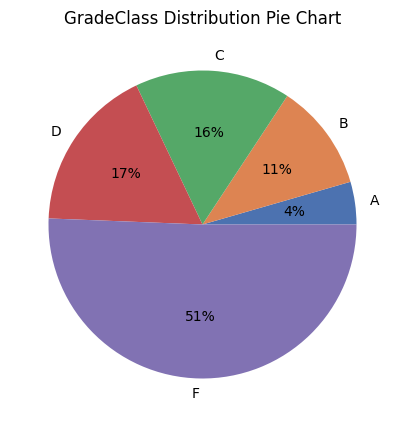

In [ ]:
plt.figure(figsize = (7,5))

colors = sns.color_palette('deep')[ 0:5 ]

plt.pie(df['GradeClass'].value_counts().sort_index(),labels = labels,colors = colors,autopct='%.0f%%')
plt.title("GradeClass Distribution Pie Chart")

plt.show() 

## Explanation
- df['GradeClass'].value_counts().sort_index(): Counts the occurrences of each grade class and sorts them by their index.

- sns.color_palette('deep')[0:5]: Generates a palette of colors from Seaborn's deep palette for the pie slices.

- plt.pie(): Creates the pie chart with specified labels, colors, and percentage formatting (autopct='%.0f%%').

- plt.title(): Sets the title of the pie chart.

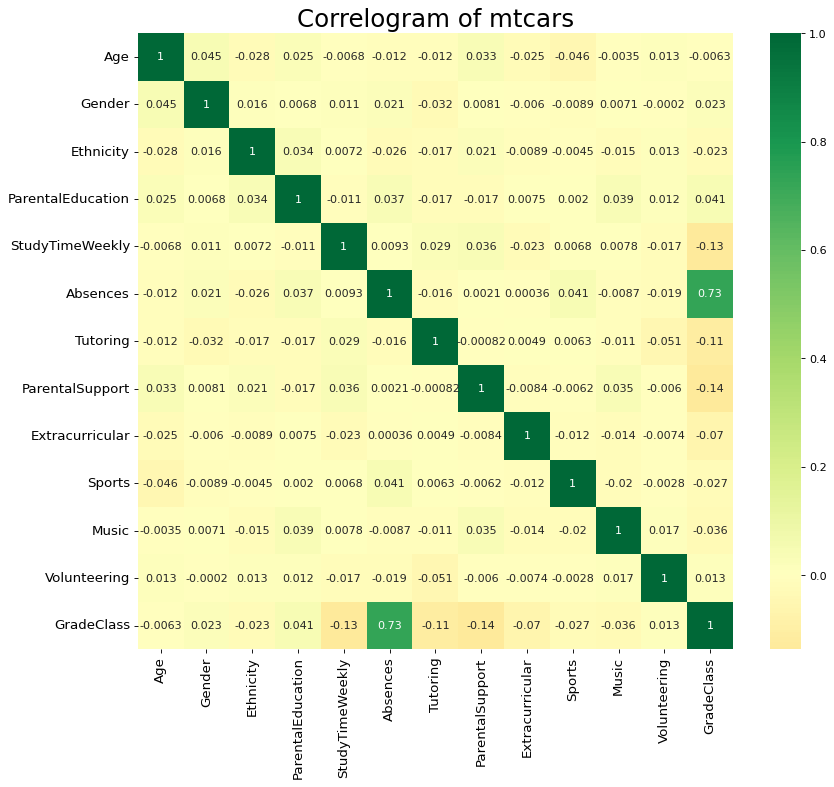

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Code Explanation
- Import Libraries: Ensure you have imported necessary libraries (matplotlib.pyplot and seaborn).

- Set Figure Size and DPI: Use plt.figure(figsize=(12, 10), dpi=80) to set the size of the figure and the dots per inch (resolution).

- Create Heatmap: Use sns.heatmap() to plot the correlation matrix (df.corr()). Parameters include:

- xticklabels and yticklabels: Sets the labels for the x-axis and y-axis based on column names.

- cmap='RdYlGn': Specifies the color map (Red-Yellow-Green).

- center=0: Sets the center of the color map at 0.

- annot=True: Displays the correlation coefficients on the heatmap.

- Set Title and Axis Labels: Use plt.title() to set the title of the plot and plt.xticks() / plt.yticks() to adjust the font size of tick labels.

- Display Plot: Use plt.show() to display the heatmap.

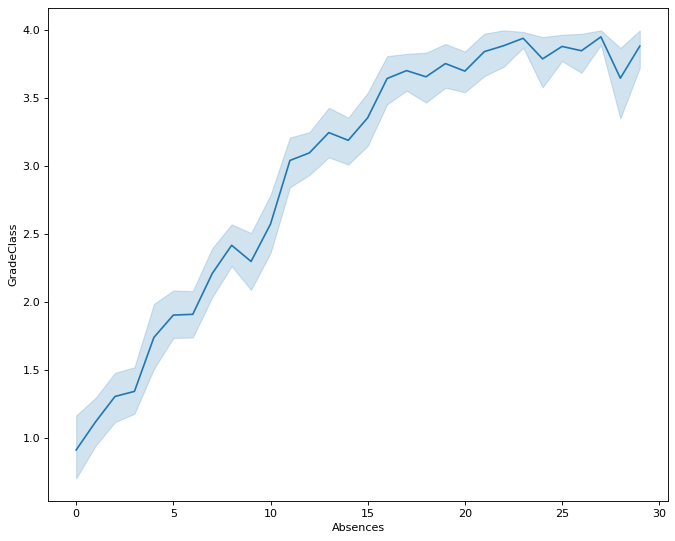

In [ ]:
plt.figure(figsize=(10,8), dpi= 80)
sns.lineplot(df,x = 'Absences',y = 'GradeClass')
plt.show()

# Data Modeling

In [ ]:
y = df['GradeClass']
X = df.drop('GradeClass',axis = 1)

In [ ]:
print(X.shape,y.shape)

(2392, 12) (2392,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# scale data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# split our data to train ans test
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
# LogisticRegression
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
y_pred = pd.Series(y_pred)

logist_clf_score = accuracy_score(y_test, y_pred)
print(f"LogisticRegression: {logist_clf_score}") # LogisticRegression: 0.7089136490250696

LogisticRegression: 0.7089136490250696


=== KNN ===
Max accuracy: 0.6114206128133705
Best param: 23


<Axes: >

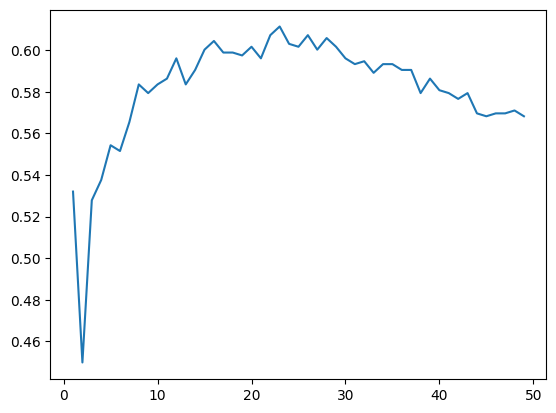

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

mx = 0 # max accuracy
mx_n = 0 # max_accuracy n_neighbours

n_arr = [] # list for n_neight
n_score = [] # list for accuracies

for n_neigh in range(1,50):
    
    neigh = KNeighborsClassifier(n_neighbors=n_neigh)
    neigh.fit(X_train, y_train)
    
    y_pred = pd.Series(neigh.predict(X_test))
    
    n_acc = accuracy_score(y_test, y_pred)
    
    n_arr.append(n_neigh)
    n_score.append(n_acc)
    
    if n_acc > mx:
        mx = n_acc
        mx_n = n_neigh
        
print("=== KNN ===")
print(f"Max accuracy: {mx}") # Max accuracy: 0.6114206128133705
print(f"Best param: {mx_n}") # Best param: 23
print("===========")
sns.lineplot(x = n_arr,y = n_score)


In [ ]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV  

param_grid = [{
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [1,2,3,5,7,9,11],
    'min_samples_split': [2,3,5,6,7,9]
}]

des_tree = DecisionTreeClassifier()

clf = GridSearchCV(des_tree, param_grid)
clf.fit(X_train,y_train)

y_pred = pd.Series(clf.predict(X_test))

des_tree_acc = accuracy_score(y_test, y_pred)

print(f"DecisionTreeClassifier: {des_tree_acc}") # DecisionTreeClassifier: 0.6657381615598886
print(clf.best_params_) # 'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2

DecisionTreeClassifier: 0.6657381615598886
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_forst = RandomForestClassifier(n_estimators = 1000,criterion = 'log_loss',max_depth = 11,min_samples_split = 5,min_samples_leaf=3)
rand_forst.fit(X_train,y_train)

y_pred = pd.Series(rand_forst.predict(X_test))
rand_forst_acc = accuracy_score(y_test, y_pred)

print(f"RandomForestClassifier: {rand_forst_acc}")

RandomForestClassifier: 0.6991643454038997


<Axes: >

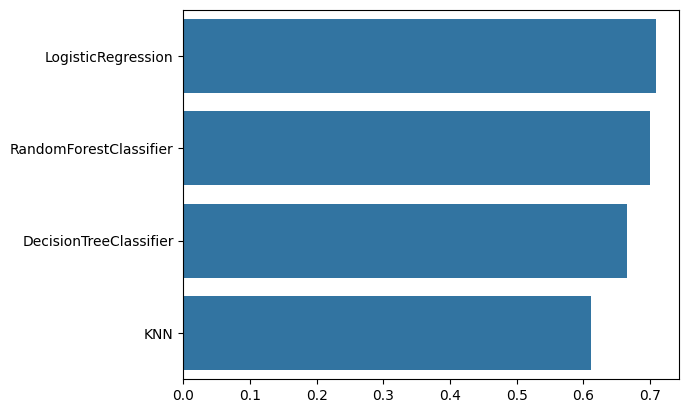

In [ ]:
models = ['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','KNN']
models_acc = [0.7089136490250696,0.7005571030640668,0.6657381615598886,0.6114206128133705]

sns.barplot(y = models,x = models_acc)